# Testing 1, 2, 1, 2...

This code is simply to test if everything is running propperly.

In [1]:
from qiskit import QuantumCircuit
from qiskit.visualization import plot_histogram
from qiskit.tools.monitor import job_monitor
from azure.quantum.qiskit import AzureQuantumProvider

In [2]:
from azure.quantum.qiskit import AzureQuantumProvider
provider = AzureQuantumProvider (
    resource_id = "/subscriptions/b1d7f7f8-743f-458e-b3a0-3e09734d716d/resourceGroups/aq-hackathons/providers/Microsoft.Quantum/Workspaces/aq-hackathon-01",
    location = "eastus"
)

In [3]:
print([backend.name() for backend in provider.backends()])

['ionq.qpu', 'ionq.simulator']


In [4]:
# Create a Quantum Circuit acting on the q register
circuit = QuantumCircuit(3, 3)
circuit.name = "Qiskit Sample - 3-qubit GHZ circuit"
circuit.h(0)
circuit.cx(0, 1)
circuit.cx(1, 2)
circuit.measure([0,1,2], [0, 1, 2])

# Print out the circuit
circuit.draw()

┌───┐          ┌─┐      
q_0: ┤ H ├──■───────┤M├──────
     └───┘┌─┴─┐     └╥┘┌─┐   
q_1: ─────┤ X ├──■───╫─┤M├───
          └───┘┌─┴─┐ ║ └╥┘┌─┐
q_2: ──────────┤ X ├─╫──╫─┤M├
               └───┘ ║  ║ └╥┘
c: 3/════════════════╩══╩══╩═
                     0  1  2

In [5]:
simulator_backend = provider.get_backend("ionq.simulator")

In [6]:
job = simulator_backend.run(circuit, shots=100)
job_id = job.id()
print("Job id", job_id)

Job id d1b5e2f9-811a-11ec-a4ad-342eb752d469


In [7]:
job_monitor(job)

Job Status: job has successfully run


In [8]:
result = job.result()

In [9]:
type(result)

qiskit.result.result.Result

In [10]:
print(result)

Result(backend_name='ionq.simulator', backend_version='1', qobj_id='Qiskit Sample - 3-qubit GHZ circuit', job_id='d1b5e2f9-811a-11ec-a4ad-342eb752d469', success=True, results=[ExperimentResult(shots=100, success=True, meas_level=2, data=ExperimentResultData(counts=defaultdict(<class 'int'>, {'000': 50, '111': 50}), probabilities=defaultdict(<class 'int'>, {'000': 0.5, '111': 0.5})), header=QobjExperimentHeader(meas_map='[0, 1, 2]', name='Qiskit Sample - 3-qubit GHZ circuit', num_qubits='3', qiskit='True'))])


{'000': 50, '001': 0, '010': 0, '011': 0, '100': 0, '101': 0, '110': 0, '111': 50}


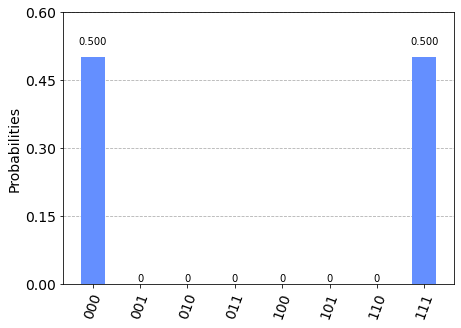

In [12]:
# The histogram returned by the results can be sparse, so here we add any of the missing bitstring labels.
counts = {format(n, "03b"): 0 for n in range(8)}
counts.update(result.get_counts(circuit))
print(counts)
plot_histogram(counts)

Using the real thing :D

In [13]:
qpu_backend = provider.get_backend("ionq.qpu")

In [16]:
cost = qpu_backend.estimate_cost(circuit, shots=1024)
print(f"Estimated cost: {cost.estimated_total}")

Estimated cost: 1.0


Job id 529e108c-811b-11ec-a326-342eb752d469
Job Status: job has successfully run
Result(backend_name='ionq.qpu', backend_version='1', qobj_id='Qiskit Sample - 3-qubit GHZ circuit', job_id='529e108c-811b-11ec-a326-342eb752d469', success=True, results=[ExperimentResult(shots=1024, success=True, meas_level=2, data=ExperimentResultData(counts=defaultdict(<class 'int'>, {'000': 492, '001': 6, '010': 4, '011': 7, '100': 5, '101': 6, '110': 8, '111': 496}), probabilities=defaultdict(<class 'int'>, {'000': 0.48046875, '001': 0.005859375, '010': 0.00390625, '011': 0.0068359375, '100': 0.0048828125, '101': 0.005859375, '110': 0.0078125, '111': 0.484375})), header=QobjExperimentHeader(meas_map='[0, 1, 2]', name='Qiskit Sample - 3-qubit GHZ circuit', num_qubits='3', qiskit='True'))])
{'000': 492, '001': 6, '010': 4, '011': 7, '100': 5, '101': 6, '110': 8, '111': 496}


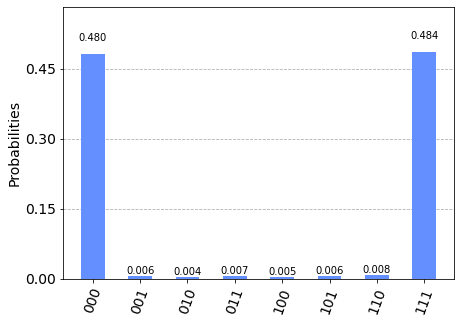

In [17]:
# Submit the circuit to run on Azure Quantum
qpu_job = qpu_backend.run(circuit, shots=1024)
job_id = qpu_job.id()
print("Job id", job_id)

# Monitor job progress and wait until complete:
job_monitor(qpu_job)

# Get the job results (this method also waits for the Job to complete):
result = qpu_job.result()
print(result)
counts = {format(n, "03b"): 0 for n in range(8)}
counts.update(result.get_counts(circuit))
print(counts)
plot_histogram(counts)